In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [3]:
data = pd.read_csv('heart.csv')

a) Xóa dữ liệu trống

In [5]:
data.dropna(how = 'all', axis=1, inplace=True)  

Đổi tên các cột

In [6]:
data.rename(index=str,columns={'cp':'chest_pain_type'},inplace=True)
data.rename(index=str,columns={'trestbps':'resting_blood_pressure'},inplace=True)
data.rename(index=str,columns={'chol':'cholesterol'},inplace=True)
data.rename(index=str,columns={'fbs':'fasting_blood_sugar'},inplace=True)
data.rename(index=str,columns={'restecg':'rest_ecg'},inplace=True)
data.rename(index=str,columns={'thalach':'max_heart_rate_achieved'},inplace=True)
data.rename(index=str,columns={'exang':'exercise_induced_angina'},inplace=True)
data.rename(index=str,columns={'oldpeak':'st_depression'},inplace=True)
data.rename(index=str,columns={'slope':'st_slope'},inplace=True)
data.rename(index=str,columns={'ca':'num_major_vessels'},inplace=True)
data.rename(index=str,columns={'thal':'thalassemia'},inplace=True)

<Axes: >

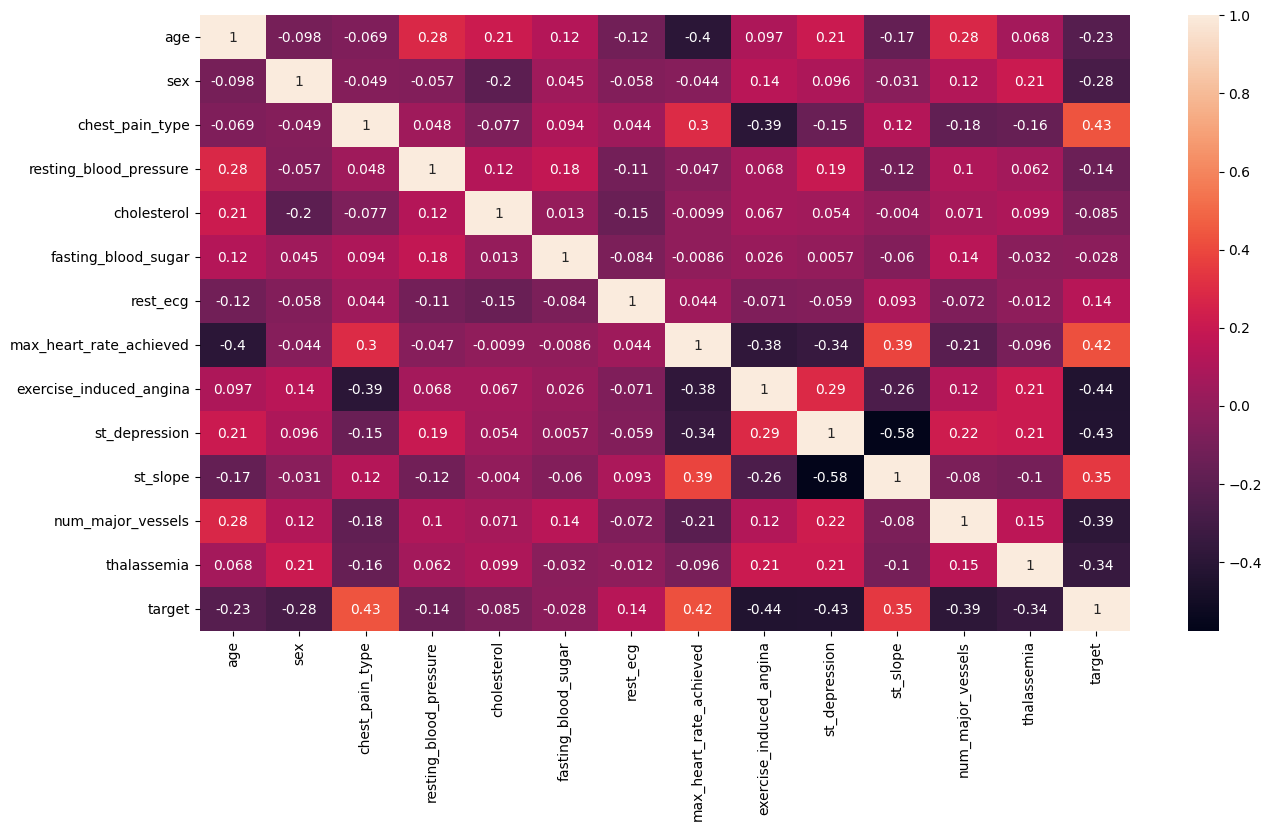

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr('pearson'), annot=True)

In [11]:
data.drop(['chest_pain_type','max_heart_rate_achieved'], axis=1, inplace=True)

In [12]:
features = data.drop('target',axis=1)
labels = data['target']

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(features, labels, test_size=0.4, random_state=42)

In [17]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
#Train Decision Tree Classifér
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
tree_pred = clf.predict(X_test)

tree_score = metrics.accuracy_score(Y_test, tree_pred)
print('Accuracy: ', tree_score)
print('Report: ', metrics.classification_report(Y_test, tree_pred))

Accuracy:  0.7377049180327869
Report:                precision    recall  f1-score   support

           0       0.68      0.73      0.70        52
           1       0.79      0.74      0.76        70

    accuracy                           0.74       122
   macro avg       0.73      0.74      0.73       122
weighted avg       0.74      0.74      0.74       122



In [19]:
tree_cm = metrics.confusion_matrix(Y_test, tree_pred)

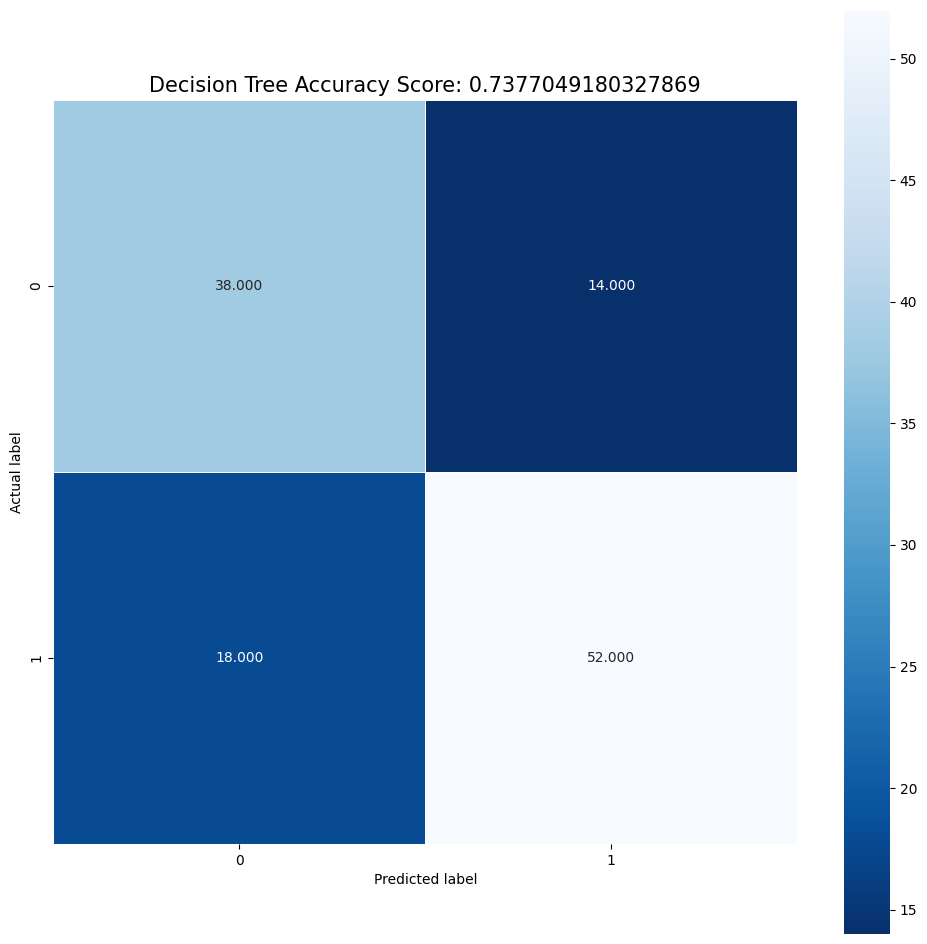

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title,size=15);  

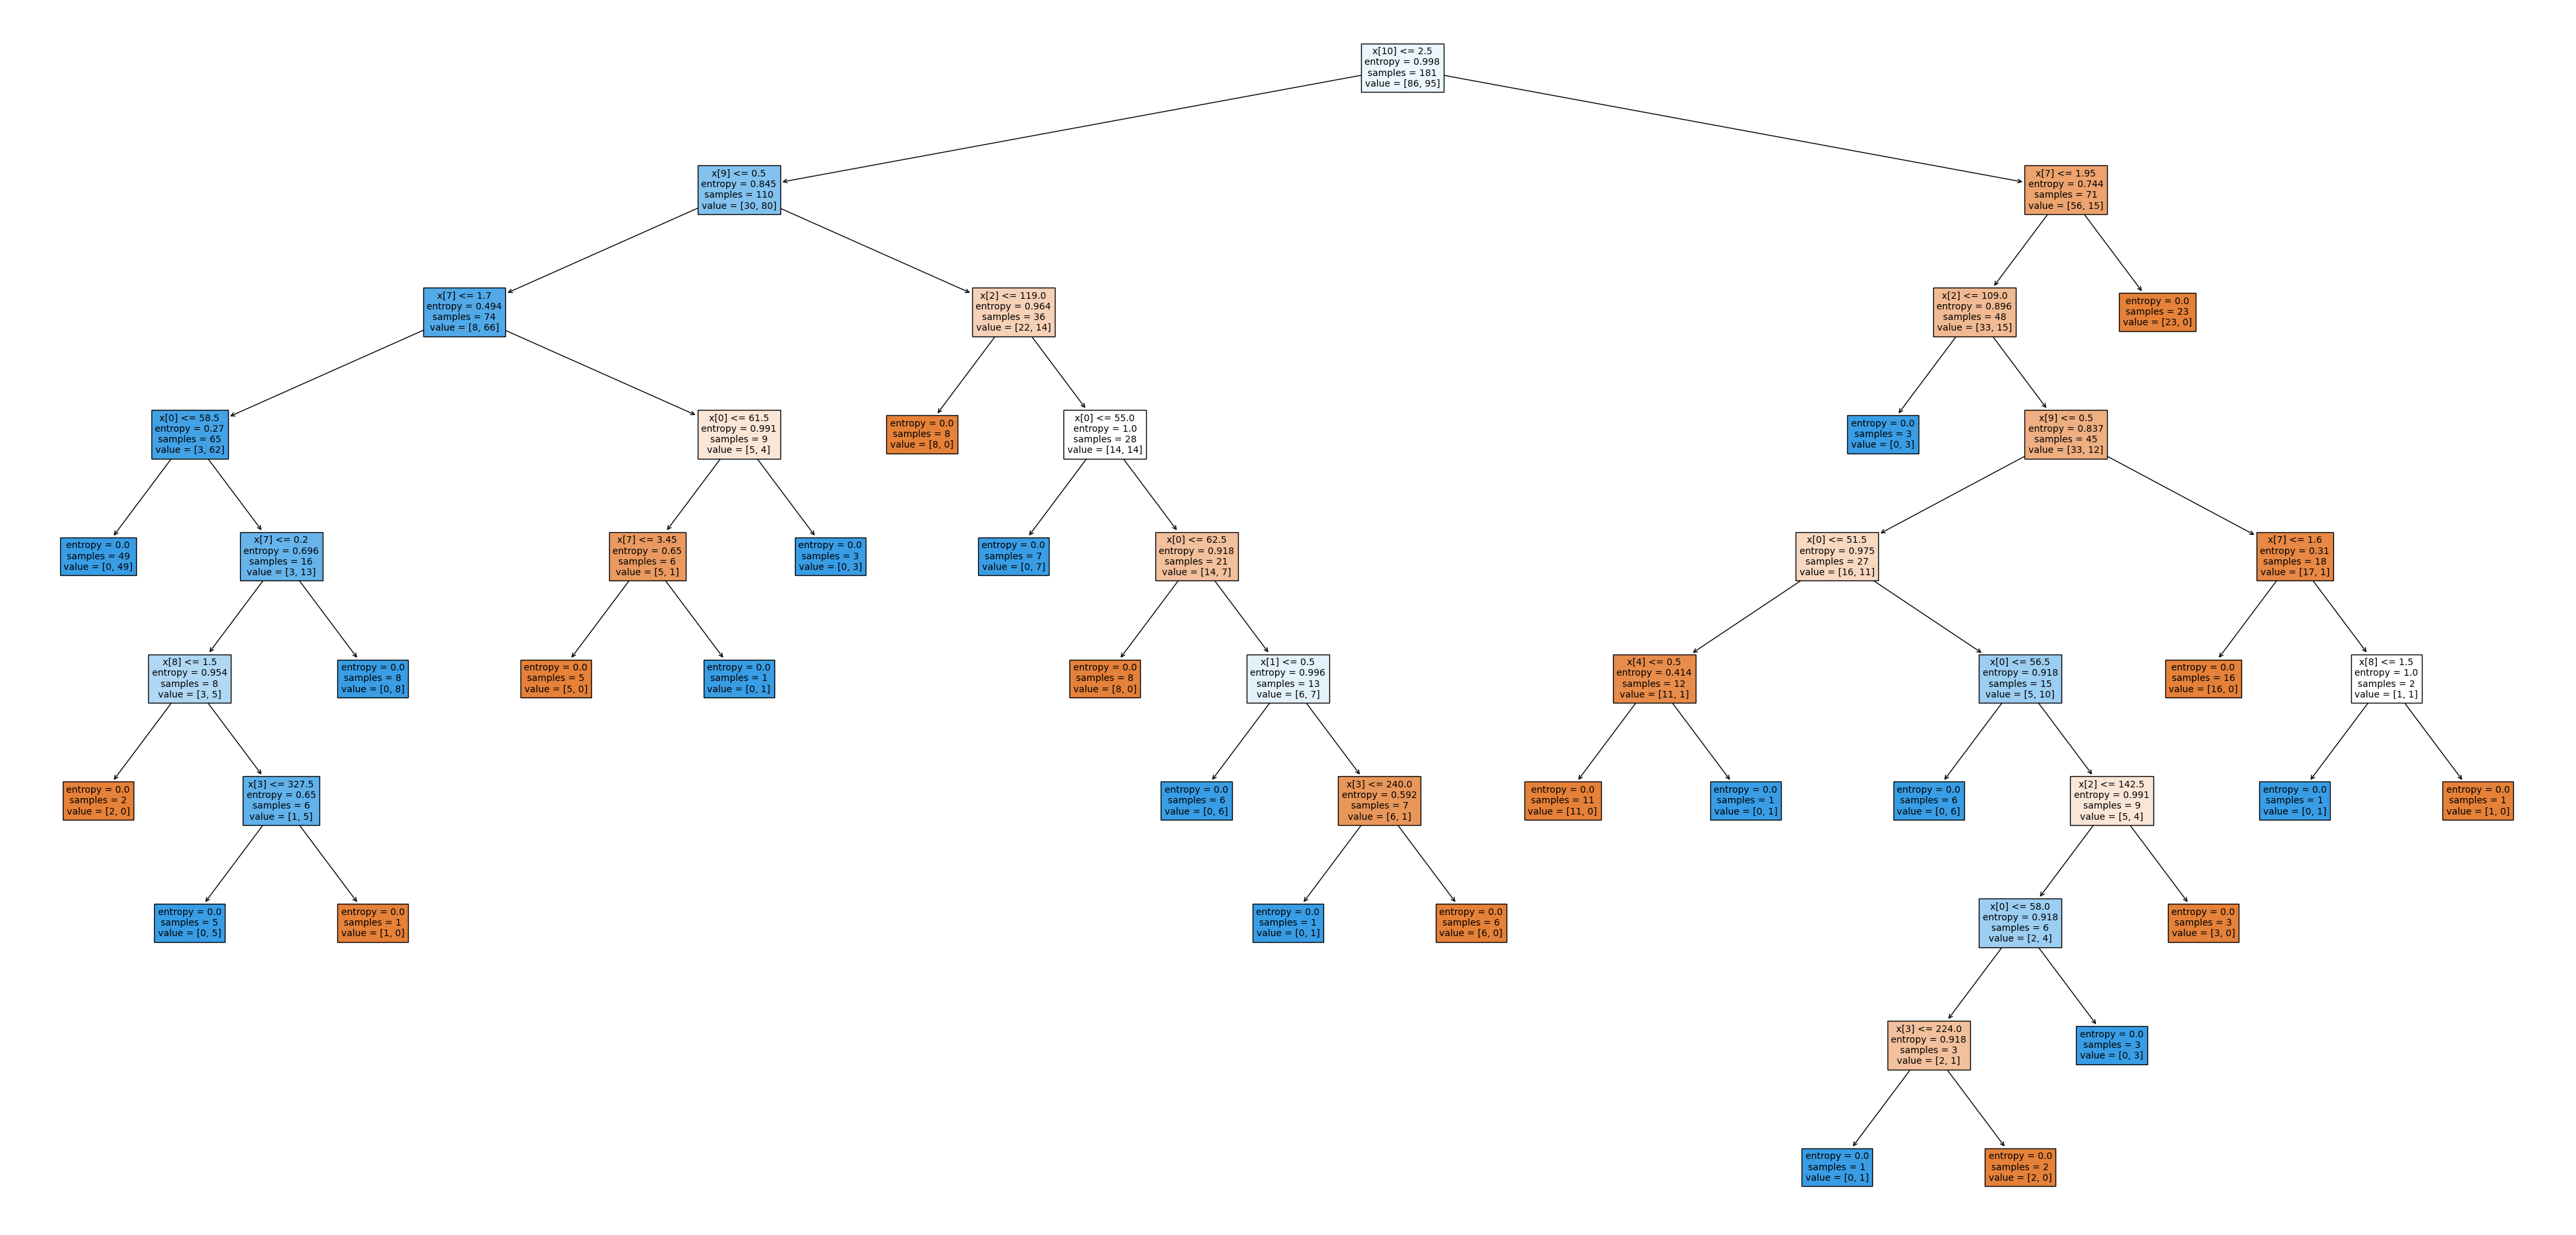

In [26]:
#Biểu diễn cây ID3 
fig,ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

In [21]:
#Xây dựng cây CART
clf2= tree.DecisionTreeClassifier(criterion="gini", random_state=0)
clf2.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
tree_pred2 = clf2.predict(X_test)

tree_score2 = metrics.accuracy_score(Y_test, tree_pred2)
print('Accuracy: ', tree_score2)
print('Report: ', metrics.classification_report(Y_test, tree_pred2))

Accuracy:  0.7213114754098361
Report:                precision    recall  f1-score   support

           0       0.65      0.75      0.70        52
           1       0.79      0.70      0.74        70

    accuracy                           0.72       122
   macro avg       0.72      0.72      0.72       122
weighted avg       0.73      0.72      0.72       122



In [23]:
#Ma trận nhầm lẫn
tree_cm2 = metrics.confusion_matrix(Y_test,tree_pred2)
tree_cm2

array([[39, 13],
       [21, 49]], dtype=int64)

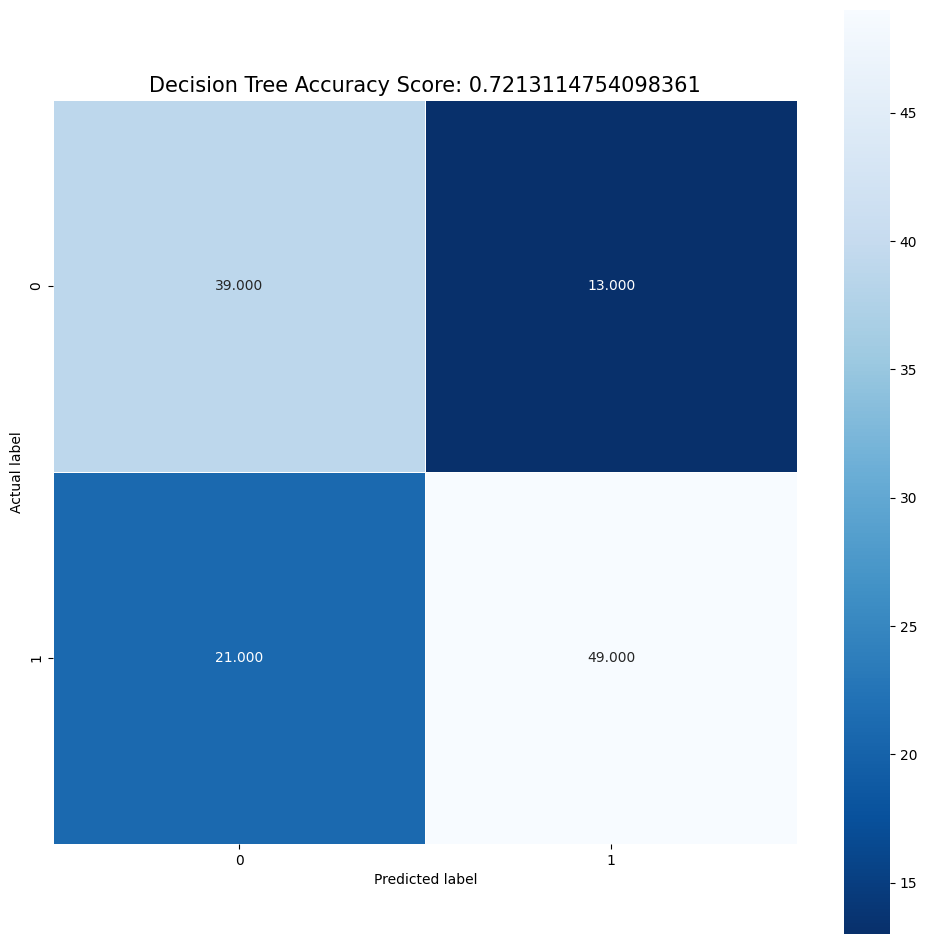

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm2, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score2)
plt.title(title,size=15); 

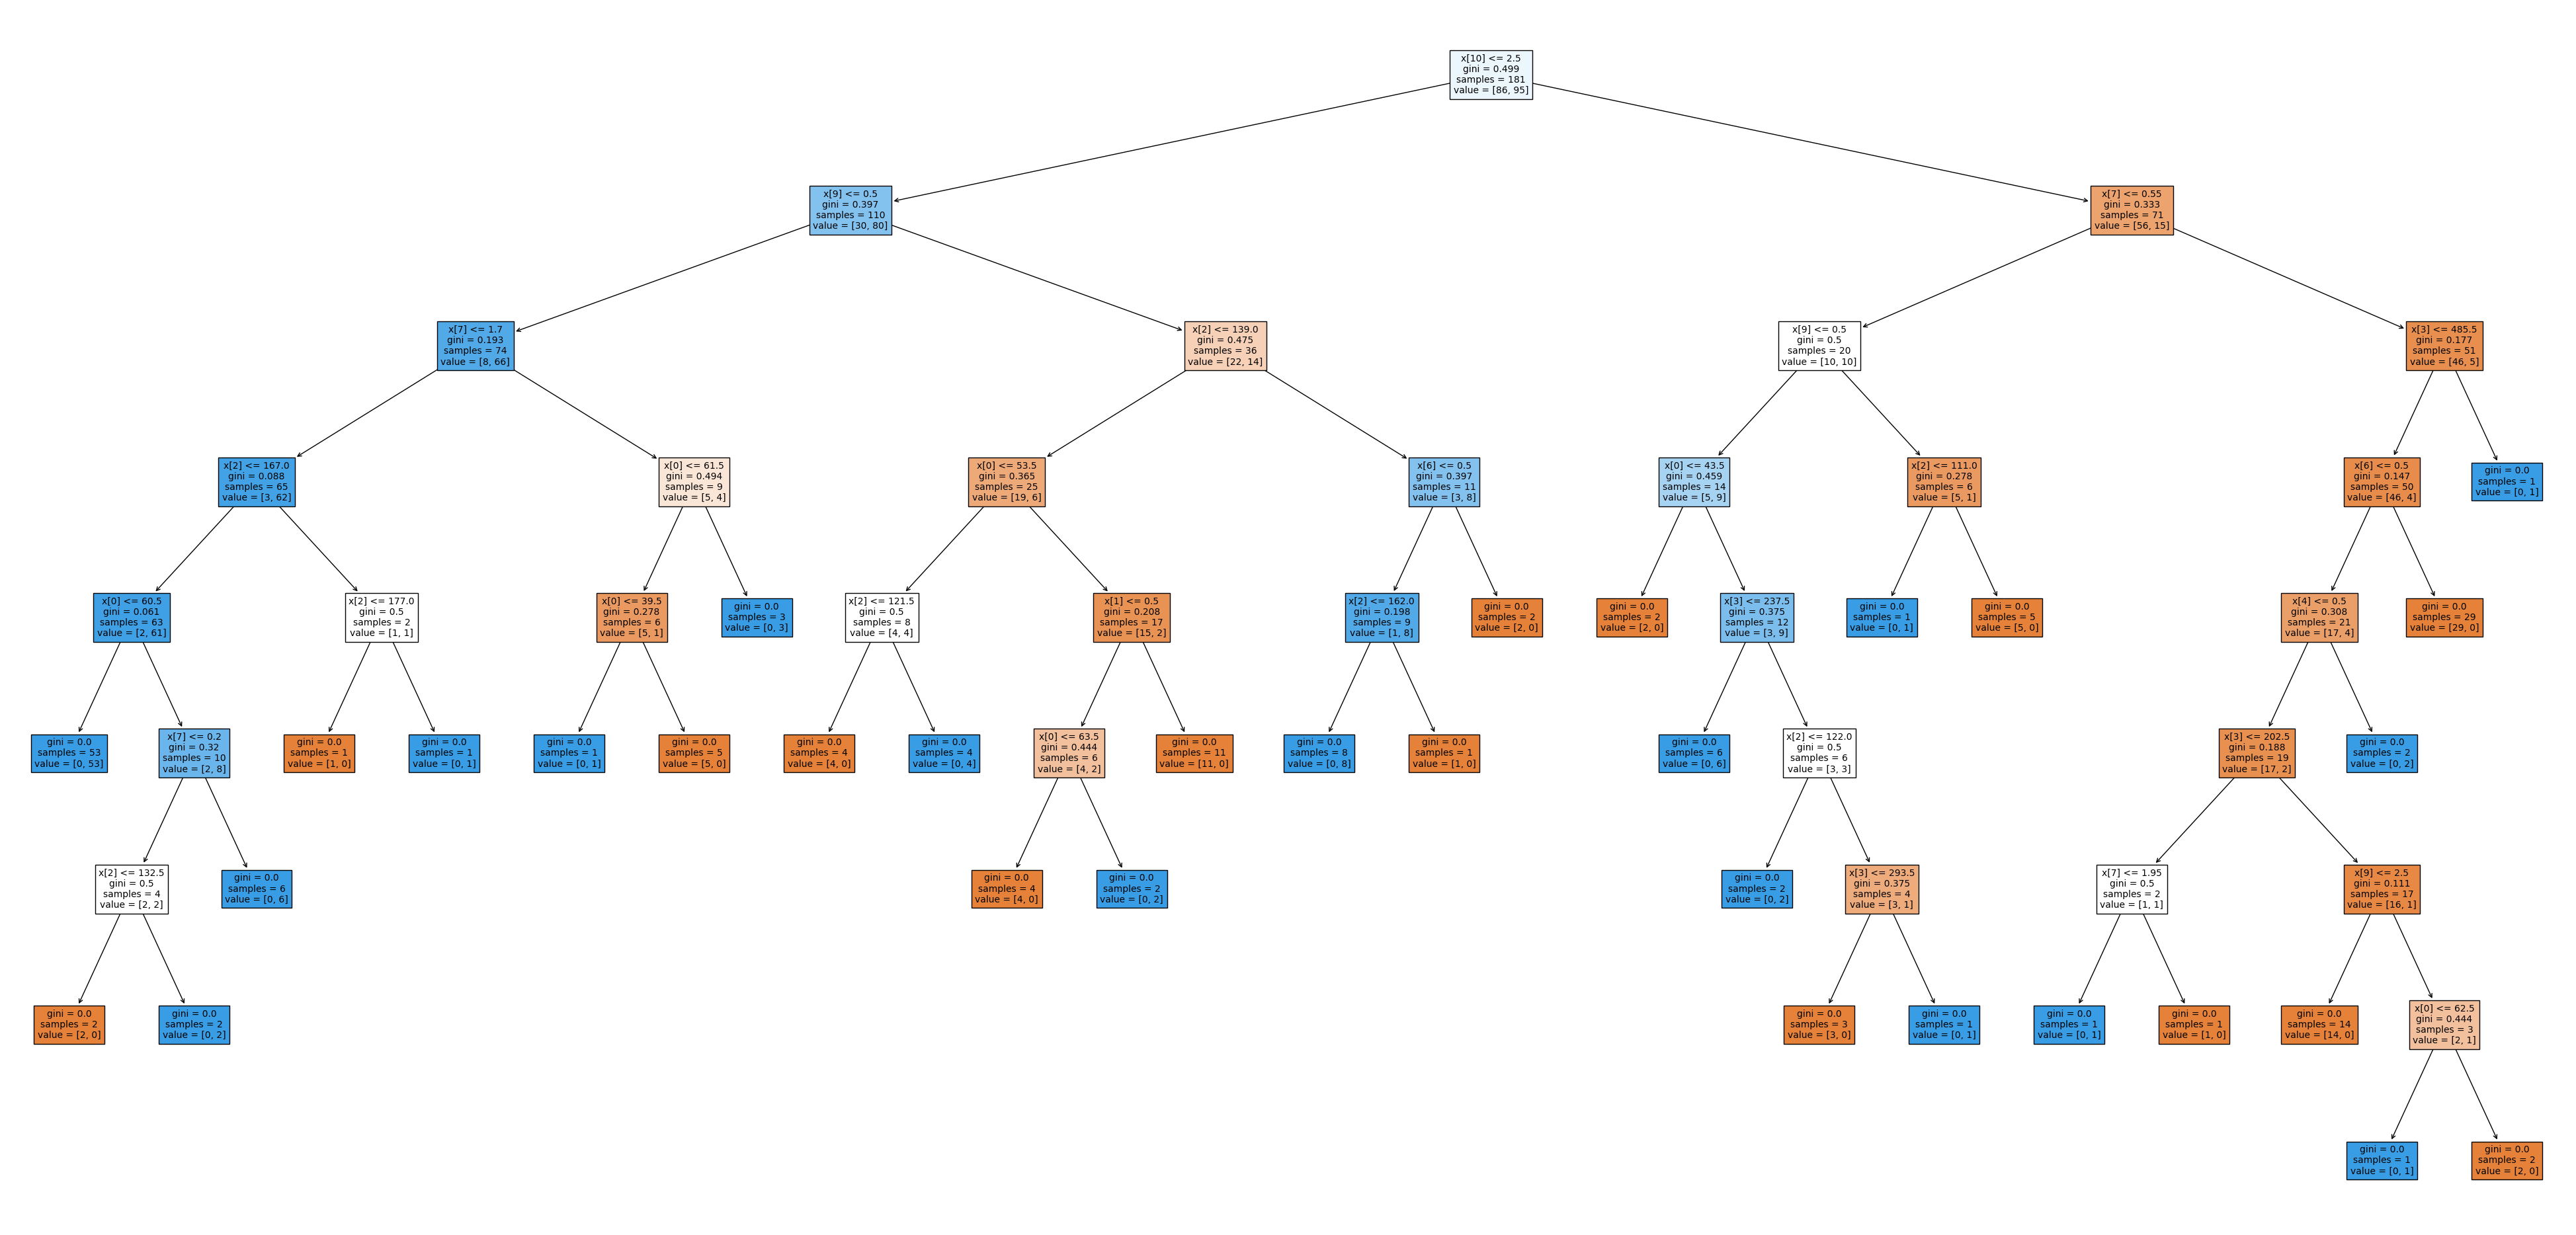

In [25]:
#Biểu diễn cây gini 
fig,ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf2,filled=True,fontsize=10)
plt.savefig('decision_tree2',dpi=100)
plt.show()

In [27]:
# Xây dựng cây Bayes
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, Y_train).predict(X_test)

In [28]:
# Model Accuracy, how often is the classifier correct?
bayes_score = metrics.accuracy_score(Y_test, bayes_pred)
print('Accuracy: ', bayes_score)
print('Report: ', metrics.classification_report(Y_test, bayes_pred))

Accuracy:  0.7950819672131147
Report:                precision    recall  f1-score   support

           0       0.72      0.85      0.78        52
           1       0.87      0.76      0.81        70

    accuracy                           0.80       122
   macro avg       0.80      0.80      0.79       122
weighted avg       0.81      0.80      0.80       122



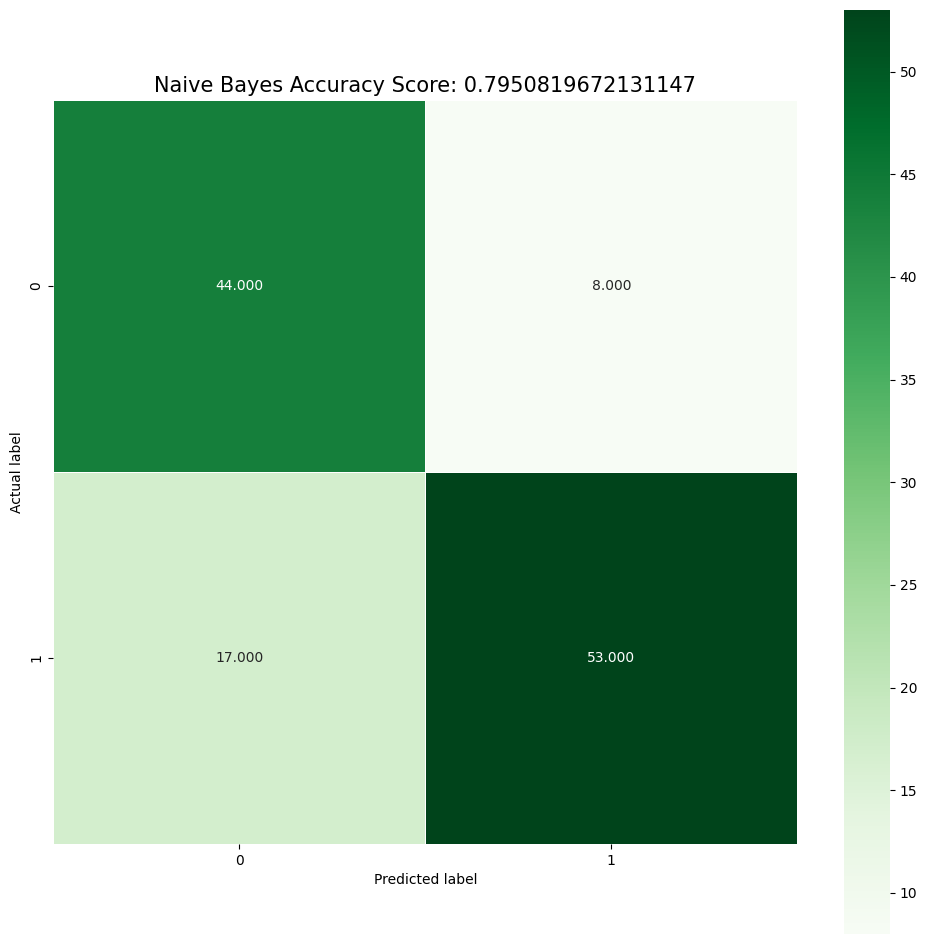

In [29]:
bayes_cm = metrics.confusion_matrix(Y_test,bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f",linewidths=.5,square=True,cmap="Greens");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title,size=15);